In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sleep_error(dt):
    t0 = time.perf_counter_ns()
    time.sleep(dt)
    t1 = time.perf_counter_ns()
    return abs((t1 - t0) * 1e-9 - dt) / dt

In [3]:
sleep_times = [1e-6 * (2**n) for n in range(15)]
sleep_errors = [[sleep_error(dt) for _ in range(100)] for dt in sleep_times]

In [4]:
# Calculate average and standard deviation of errors
average_errors = [np.mean(errors) for errors in sleep_errors]
std_errors = [np.std(errors) for errors in sleep_errors]

# Fit a first-degree polynomial (linear regression)
coefficients = np.polyfit(np.log(sleep_times), np.log(average_errors), 1)
m, b = coefficients[0], coefficients[1]
print(f"Fitted relative error = {np.exp(b)} * t^{m}")

Fitted relative error = 7.014706063874381e-05 * t^-0.9718977782809128


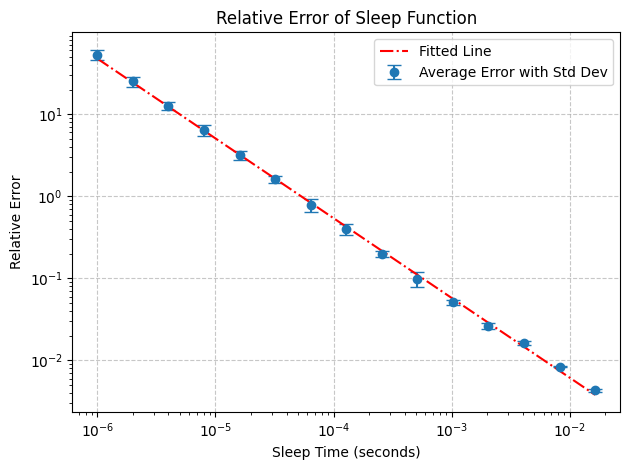

In [5]:
# Plot data
plt.errorbar(sleep_times, average_errors, yerr=std_errors, fmt='o', capsize=5, label='Average Error with Std Dev')
plt.xlabel('Sleep Time (seconds)')
plt.ylabel('Relative Error')
plt.title('Relative Error of Sleep Function')

# Plot the fitted line
fitted_line = np.exp(b) * np.array(sleep_times) ** m
plt.plot(sleep_times, fitted_line, label='Fitted Line', color='red', linestyle='-.')

plt.grid(linestyle='--', alpha=0.7)
plt.loglog()
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Smallest estimated sleep time with relative error below threshold
threshold = 0.01  # 1%
t_threshold = (threshold / np.exp(b)) ** (1 / m)
print(f"Smallest estimated sleep time with relative error below {threshold*100}%: {t_threshold} seconds")

Smallest sleep time with relative error below 1.0%: 0.008192 seconds
